# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Trifine Laurensi Br Ginting
- **Email:** trifine.laurensi08@gmail.com
- **ID Dicoding:** trifinel08

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda dalam kurun waktu 2011-2012?
- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?
- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
- Apakah ada perbedaan jumlah sewa antara hari libur, hari biasa maupun hari kerja?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

**Memuat tabel day menjadi sebuah DataFrame**

In [4]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Memuat tabel hour menjadi sebuah DataFrame**

In [5]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**menilai day_df.**

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan data yang terlihat tidak ada missing value pada setiap kolomnya.

Namun ada masalah dengan tipe data dari kolom dteday yang harusnya "datetime64" bukan object

**Mengecek duplikasi data pada tabel day_df**

In [7]:
day_df.duplicated().sum()

0

tidak ada data yang terduplikat

**Memeriksa parameter statistik**

In [8]:
day_df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


berdasarkan data yang terlihat tidak terdapat kejanggalan ataupun keanehan dari tabel day_df

**menilai hour_df.**

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan data yang terlihat tidak ada missing value pada setiap kolomnya.

Namun ada masalah dengan tipe data dari kolom dteday yang harusnya "datetime64" bukan object

**Mengecek duplikasi data pada tabel hour_df**

In [10]:
day_df.duplicated().sum()

0

tidak ada data yang terduplikat

**Memeriksa parameter statistik**

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


berdasarkan data yang terlihat tidak terdapat kejanggalan ataupun keanehan dari tabel hour_df

### Cleaning Data

**Mengganti tipe data**
dtetime pada tabel day_df dan hour_df menjadi datetime64

In [12]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

berdasarkan data tersebut kolom dteday pada day_df dan hour_df sudah bertipe "datetime64" berjalan sesuai dengan harapan

**Mengubah Nama Kolom**

agar lebih nyaman untuk dibaca

In [15]:
day_df.rename(columns={
    "dteday": "dateday",
    "yr": "year",
    "mnth": "month",
    "weathersit": "weather_cond",
    "cnt": "count"
}, inplace=True)

day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
hour_df.rename(columns={
    "dteday": "dateday",
    "yr": "year",
    "mnth": "month",
    "weathersit": "weather_cond",
    "cnt": "count"
}, inplace=True)

hour_df.head()

,instant,dateday,season,year,month,hr,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Mengubah beberapa kolom yang bertipe int menjadi category**

agar pemahaman akan data lebih mudah dipahami

In [17]:
day_df["month"] = day_df["month"].map({
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
})
day_df["season"] = day_df["season"].map({
    1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"
})
day_df["weekday"] = day_df["weekday"].map({
    0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"
})
day_df["weather_cond"] = day_df["weather_cond"].map({
    1: "Clear/Partly Cloudy",
    2: "Misty/Cloudy",
    3: "Light Snow/Rain",
    4: "Severe Weather"
})

In [18]:
hour_df["month"] = hour_df["month"].map({
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
})
hour_df["season"] = hour_df["season"].map({
    1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"
})
hour_df["weekday"] = hour_df["weekday"].map({
    0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"
})
hour_df["weather_cond"] = hour_df["weather_cond"].map({
    1: "Clear/Partly Cloudy",
    2: "Misty/Cloudy",
    3: "Light Snow/Rain",
    4: "Severe Weather"
})

In [19]:
day_df["season"] = day_df.season.astype("category")
day_df["year"] = day_df.year.astype("category")
day_df["month"] = day_df.month.astype("category")
day_df["holiday"] = day_df.holiday.astype("category")
day_df["weekday"] = day_df.weekday.astype("category")
day_df["workingday"] = day_df.workingday.astype("category")
day_df["weather_cond"] = day_df.weather_cond.astype("category")

In [20]:
hour_df["season"] = hour_df.season.astype("category")
hour_df["year"] = hour_df.year.astype("category")
hour_df["month"] = hour_df.month.astype("category")
hour_df["holiday"] = hour_df.holiday.astype("category")
hour_df["weekday"] = hour_df.weekday.astype("category")
hour_df["workingday"] = hour_df.workingday.astype("category")
hour_df["weather_cond"] = hour_df.weather_cond.astype("category")

selanjutnya kita akan mengecek apakah tipe data nya berhasil berubah atau tidak

In [21]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   dateday       731 non-null    datetime64[ns]
 2   season        731 non-null    category      
 3   year          731 non-null    category      
 4   month         731 non-null    category      
 5   holiday       731 non-null    category      
 6   weekday       731 non-null    category      
 7   workingday    731 non-null    category      
 8   weather_cond  731 non-null    category      
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  hum           731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  casual        731 non-null    int64         
 14  registered    731 non-null    int64         
 15  count         731 non-null    int64     

In [22]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   dateday       17379 non-null  datetime64[ns]
 2   season        17379 non-null  category      
 3   year          17379 non-null  category      
 4   month         17379 non-null  category      
 5   hr            17379 non-null  int64         
 6   holiday       17379 non-null  category      
 7   weekday       17379 non-null  category      
 8   workingday    17379 non-null  category      
 9   weather_cond  17379 non-null  category      
 10  temp          17379 non-null  float64       
 11  atemp         17379 non-null  float64       
 12  hum           17379 non-null  float64       
 13  windspeed     17379 non-null  float64       
 14  casual        17379 non-null  int64         
 15  registered    17379 non-null  int64 

## Exploratory Data Analysis (EDA)

### Explore ...

**Merangkum Parameter Statistik**

In [23]:
day_df.describe(include="all")

<ipython-input-23-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731,731.0,731,731.0,731,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,2.0,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,1.0,Aug,0.0,Mon,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,366.0,62,710.0,105,500.0,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [24]:
hour_df.describe(include="all")

<ipython-input-24-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dateday,season,year,month,hr,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379,17379,17379.0,17379,17379.000000,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,2.0,12,NaN,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,1.0,Jul,NaN,0.0,Sat,1.0,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,8734.0,1488,NaN,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,NaN,NaN,6.914405,NaN,NaN,NaN,NaN,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


*   **Mengelompokkan penyewa sepeda (casual dan registered) berdasarkan bulan**


In [25]:
sort_max = day_df.groupby(by="month").agg({
    "count" : ["max", "min", "mean", "sum"]
})

sort_max.sort_values(by=("count", "max"), ascending=False)


count                           
        max   min         mean     sum
month                                 
Sep    8714  1842  5766.516667  345991
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Jul    8173  3285  5563.677419  344948
Oct    8156    22  5199.225806  322352
Jun    8120  3767  5772.366667  346342
Aug    7865  1115  5664.419355  351194
Apr    7460   795  4484.900000  269094
Nov    6852  1495  4247.183333  254831
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933

In [26]:
sort_min = day_df.groupby(by="month").agg({
    "count" : ["max", "min", "mean", "sum"]
})

sort_min.sort_values(by=("count", "min"))

count                           
        max   min         mean     sum
month                                 
Oct    8156    22  5199.225806  322352
Jan    4521   431  2176.338710  134933
Dec    6606   441  3403.806452  211036
Mar    8362   605  3692.258065  228920
Apr    7460   795  4484.900000  269094
Feb    5062  1005  2655.298246  151352
Aug    7865  1115  5664.419355  351194
Nov    6852  1495  4247.183333  254831
Sep    8714  1842  5766.516667  345991
May    8294  2633  5349.774194  331686
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342

In [27]:
sort_mean = day_df.groupby(by="month").agg({
    "count" : ["max", "min", "mean", "sum"]
})

sort_mean.sort_values(by=("count", "mean"), ascending=False)

count                           
        max   min         mean     sum
month                                 
Jun    8120  3767  5772.366667  346342
Sep    8714  1842  5766.516667  345991
Aug    7865  1115  5664.419355  351194
Jul    8173  3285  5563.677419  344948
May    8294  2633  5349.774194  331686
Oct    8156    22  5199.225806  322352
Apr    7460   795  4484.900000  269094
Nov    6852  1495  4247.183333  254831
Mar    8362   605  3692.258065  228920
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933

Berdasarkan hasil pengelompokan tersebut dapat disimpulkan bahwa
1.   Jumlah penyewa terbesar dalam 1 hari terdapat pada bulan September
2.   Jumlah penyewa terkecil dalam 1 hari terdapat pada bulan Oktober
3.   Jumlah rata-rata penyewa sepeda terbesar terdapat pada bulan Juni
4.   Jumlah rata-rata penyewa sepeda terkecil terdapat pada bulan Januari

*   **Mengelompokkan penyewa sepeda (casual dan registered) berdasarkan season (musim)**

In [28]:
sort_mean = day_df.groupby(by="season").agg({
    "count" : ["max", "min", "mean", "sum"]
})

sort_mean.sort_values(by=("count", "mean"), ascending=False)

count                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613
Spring  7836   431  2604.132597   471348

Berdasarkan hasil pengelompokan tersebut dapat disimpulkan bahwa
1.   Jumlah rata-rata penyewa sepeda terbesar berada pada musim gugur (Fall)
2.   Jumlah rata-rata penyewa sepeda terkecil berada pada musim semi (Spring)

*   **Mengelompokkan penyewa sepeda (casual dan registered) berdasarkan cuaca**

In [29]:
sort_mean = day_df.groupby(by="weather_cond").agg({
    "count" : ["max", "min", "mean", "sum"]
})

sort_mean.sort_values(by=("count", "mean"), ascending=False)

count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Misty/Cloudy         8362  605  4035.862348   996858
Light Snow/Rain      4639   22  1803.285714    37869

Berdasarkan hasil pengelompokan tersebut dapat disimpulkan bahwa
1.   Jumlah rata-rata penyewa sepeda terbesar saat cuaca cerah atau mendung (Clear/Partly Cloudy)
2.   Jumlah rata-rata penyewa sepeda terkecil saat cuaca salju ringan atau hujan (Light Snow/Rain)

 **Mengelompokkan penyewa sepeda (casual dan registered) berdasarkan hari**

1.   Berdasarkan Hari Libur (holiday)

In [30]:
sort_mean = day_df.groupby(by="holiday").agg({
    "count" : ["max", "min", "mean", "sum"]
})

sort_mean.sort_values(by=("count", "mean"), ascending=False)

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

Berdasarkan hasil pengelompokan tersebut dapat disimpulkan bahwa para penyewa sepeda lebih suka menyewa sepeda saat hari-hari biasa dan bukan hari-hari libur

2.   Berdasarkan Hari Biasa (weekday)

In [31]:
sort_mean = day_df.groupby(by="weekday").agg({
    "count" : ["max", "min", "mean", "sum"]
})

sort_mean.sort_values(by=("count", "mean"), ascending=False)

count                           
          max   min         mean     sum
weekday                                 
Fri      8362  1167  4690.288462  487790
Thu      7804   431  4667.259615  485395
Sat      8714   627  4550.542857  477807
Wed      8173   441  4548.538462  473048
Tue      7767   683  4510.663462  469109
Mon      7525    22  4338.123810  455503
Sun      8227   605  4228.828571  444027

Berdasarkan hasil pengelompokan tersebut dapat disimpulkan bahwa para penyewa sepeda lebih suka menyewa sepeda pada hari Jumat (Fri)

3.   Berdasarkan Hari Kerja (workingday)

In [32]:
sort_mean = day_df.groupby(by="workingday").agg({
    "count" : ["max", "min", "mean", "sum"]
})

sort_mean.sort_values(by=("count", "mean"), ascending=False)

count                           
             max  min         mean      sum
workingday                                 
1           8362   22  4584.820000  2292410
0           8714  605  4330.168831  1000269

Berdasarkan hasil pengelompokan tersebut dapat disimpulkan bahwa para penyewa sepeda lebih suka menyewa sepeda saat hari kerja (workingday)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyewaan sepeda dalam kurun waktu 2011-2012?

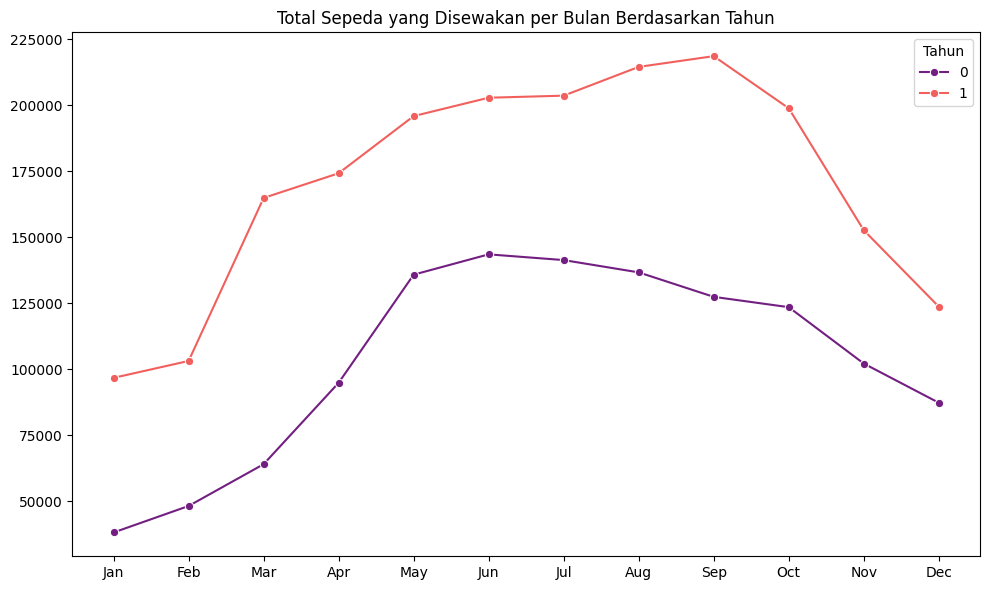

In [33]:
months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
day_df["month"] = pd.Categorical(day_df["month"], categories=months_order, ordered=True)

monthly_counts = day_df.groupby(["month", "year"])["count"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_counts, x="month", y="count", hue="year", palette="magma", marker="o")

plt.title("Total Sepeda yang Disewakan per Bulan Berdasarkan Tahun")
plt.xlabel(None)
plt.ylabel(None)

plt.legend(title="Tahun", loc="upper right")

plt.tight_layout()
plt.show()

Berdasarkan visualisasi data diatas yang menggunakan line chart , dapat disimpulkan bahwa pada tahun 2012 (diwakili angka 1) unggul sejak Januari hingga Desember walau pun grafik nya mengalami fluktuasi. Puncak penyewa sepeda tertinggi berada pada bulan September dan terrendah pada bulan januari sama dengan tahun 2011. Namun pembeda nya puncak tertinggi penyewa tahun 2011 terjadi pada bulan Juni.

### Pertanyaan 2: Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda?

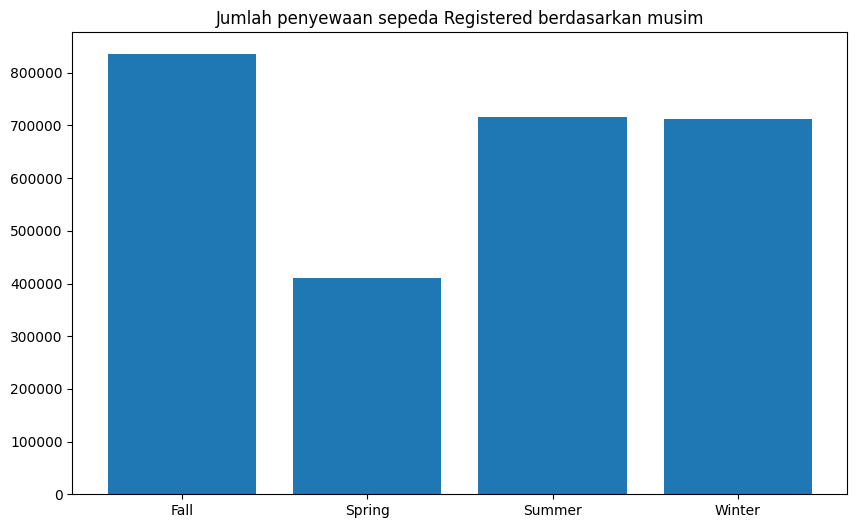

In [34]:
seasonal_affect = day_df.groupby("season")["registered"].sum().reset_index()

plt.figure(figsize=(10,6))

plt.bar(
    seasonal_affect["season"],
    seasonal_affect["registered"],
    color='tab:blue'
)
plt.title('Jumlah penyewaan sepeda Registered berdasarkan musim')
plt.show()


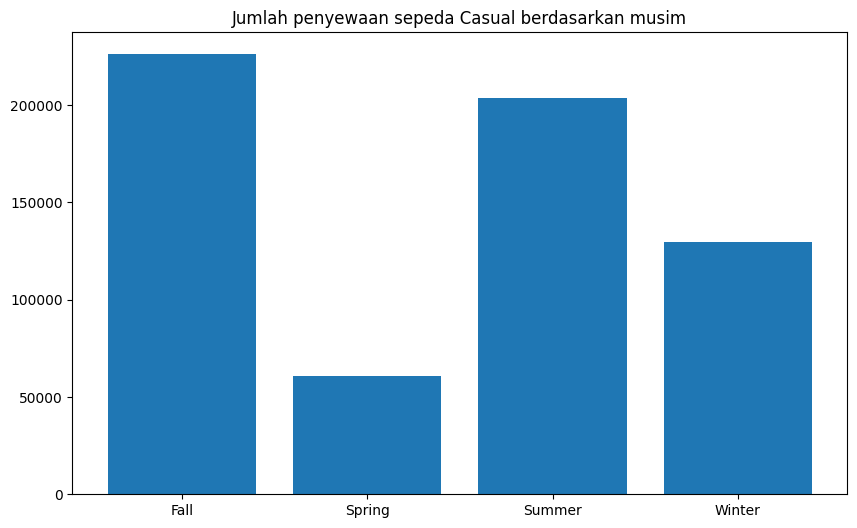

In [35]:
seasonal_affect = day_df.groupby("season")["casual"].sum().reset_index()

plt.figure(figsize=(10,6))

plt.bar(
    seasonal_affect["season"],
    seasonal_affect["casual"],
    color='tab:blue'
)

plt.title('Jumlah penyewaan sepeda Casual berdasarkan musim')
plt.show()

<ipython-input-36-6e6655b81ce2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  seasonal_affect_sum = day_df.groupby("season")["registered", "casual"].sum().reset_index()


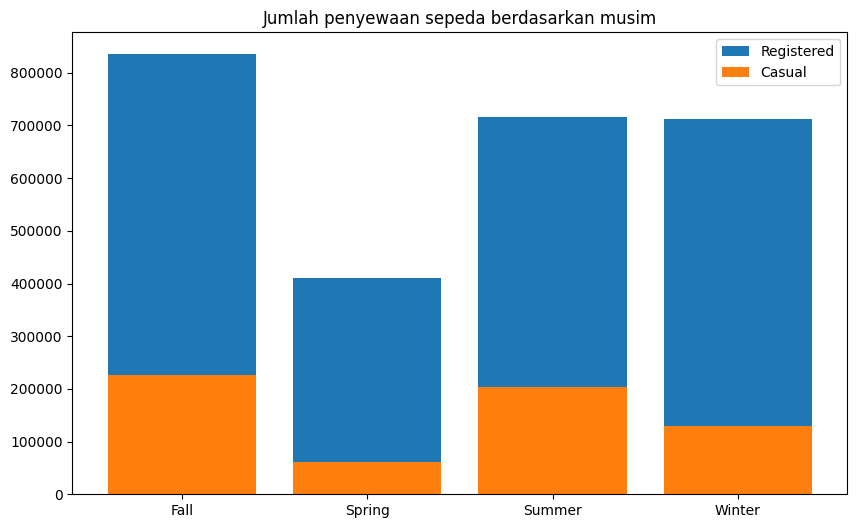

In [36]:
seasonal_affect_sum = day_df.groupby("season")["registered", "casual"].sum().reset_index()

plt.figure(figsize=(10,6))

plt.bar(
    seasonal_affect_sum["season"],
    seasonal_affect_sum["registered"],
    label ="Registered",
    color='tab:blue'
)

plt.bar(
    seasonal_affect_sum["season"],
    seasonal_affect["casual"],
    label ="Casual",
    color='tab:orange'
)

plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

Berdasarkan visualisasi data diatas yang menggunakan Bar plot, dapat disimpulkan bahwa jumlah penyewa sepeda terbesar baik kategori registered maupun casual terjadi pada saat musim gugur (Fall). Sebaliknya jumlah penyewa terkecil terjadi pada musim semi (Spring).

### Pertanyaan 3: Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?

<ipython-input-37-5e9e1340fd33>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


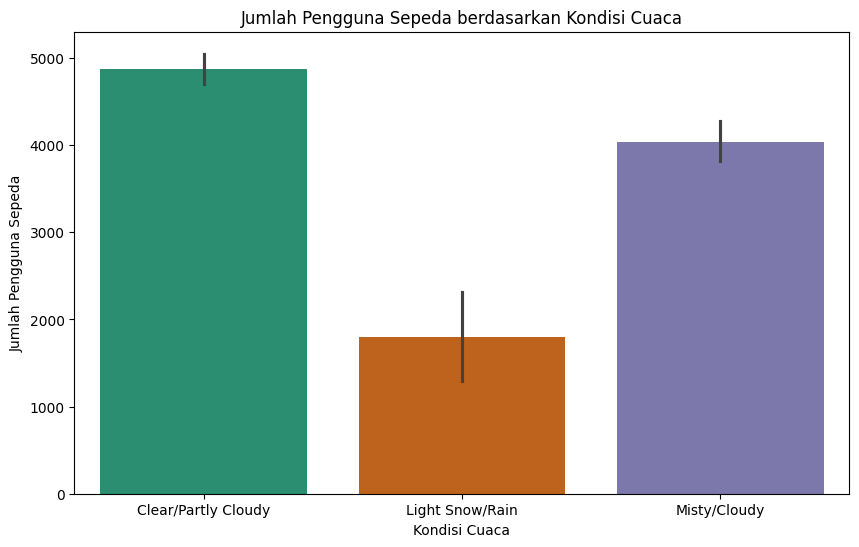

In [37]:
custom_palette = "Dark2"

plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_cond',
    y='count',
    data=day_df,
    palette=custom_palette
)

plt.title("Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Pengguna Sepeda")
plt.show()


Berdasarkan visualisasi data diatas yang menggunakan bar plot , dapat disimpulkan bahwa jumlah penyewa sepeda terbesar saat kondisi cuaca cerah atau setengah mendung (Clear/Partly Cloudy).

### Pertanyaan 4: Apakah ada perbedaan jumlah sewa antara hari libur, hari biasa maupun hari kerja?

<ipython-input-38-24eab5a48c93>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-38-24eab5a48c93>:6: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(
<ipython-input-38-24eab5a48c93>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-38-24eab5a48c93>:17: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
<ipython-input-38-24eab5a48c93>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same e

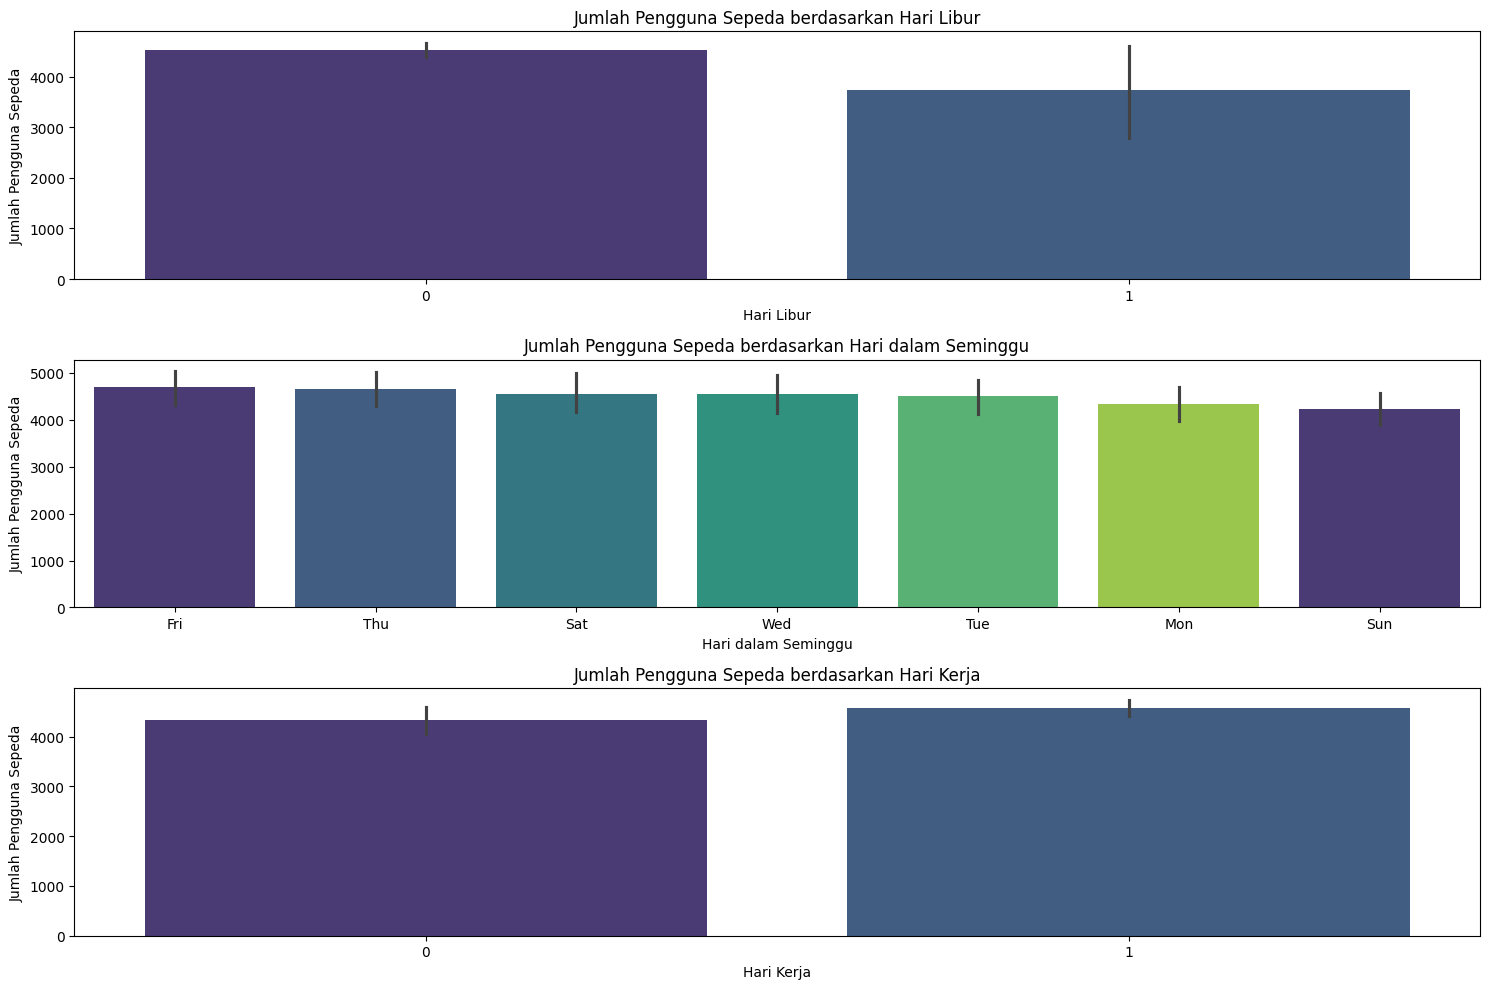

In [38]:
sorted_weekday = day_df.groupby('weekday')['count'].sum().sort_values(ascending=False).index

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# Holiday
sns.barplot(
    x='holiday',
    y='count',
    data=day_df,
    ax=axes[0],
    palette = sns.color_palette("viridis"))
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
axes[0].set_xlabel('Hari Libur')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Weekday
sns.barplot(
    x='weekday',
    y='count',
    data=day_df,
    ax=axes[1],
    order=sorted_weekday,
    palette = sns.color_palette("viridis"))
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[1].set_xlabel('Hari dalam Seminggu')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Working day
sns.barplot(
    x='workingday',
    y='count',
    data=day_df,
    ax=axes[2],
    palette = sns.color_palette("viridis")
    )
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
axes[2].set_xlabel('Hari Kerja')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()

Berdasarkan visualisasi data diatas yang menggunakan bar plot , dapat disimpulkan bahwa jumlah penyewa sepeda dipengaruhi oleh hari libur, hari biasa maupun hari kerja. Umumnya penyewa sepeda lebih dominan pada hari biasa ataupun hari kerja.

## Conclusion

- Conclution pertanyaan 1 : Pada tahun 2011 dan 2012 terlihat jelas perbedaan tren penyewaan sepeda. Terdapat juga perbedaan puncak pada kedua tahun tersebut, yaitu pada tahun 2012 puncak terjadi pada bulan September sedangkan pada tahun 2011 terjadi pada bulan Juni. Namun kedua tahun tersebut memiliki titik dasar pada bulan Januari. Sehingga dengan jelas dapat disimpulkan bahwa jumlah sepeda yang disewa tertinggi berada pada tahun 2012.


- Conclution pertanyaan 2 :Berdasarkan visualisasi data tersebut dapat disimpulkan bahwa jumlah peminat sewa sepeda terbesar berada pada musim gugur(fall) dan musim yang paling sepi peminat adalah saat musim semi (spring)


- Conclution pertanyaan 3 : Berdasarkan hasil visualisasi data dengan jelas terlihat bahwa jumlah peminat penyewa sepeda terbesar saat cuaca cerah atau sedikit mendung. Diikuti dengan cuaca yang mendung ataupun berkabut dan terakhir yang sepi peminat yaitu saat cuaca sedikit salju ataupun hujan


- Conclution pertanyaan 4 : Terdapat hubungan jumlah sewa sepeda berdasarkan hari libur, hari biasa dan hari kerja. Berdasarkan data dapat disimpulkan bahwa jumlah pengguna sepeda berdasarkan holiday (hari libur), disini non-holidaylah yang menang dengan perbedaan yang cukup signifikan daripada yang holiday. Berdasarkan workingday, workingday lah yang mengungguli non-workingday walaupun hasilnya memang tidak terlalu signifikan. Berdasarkan weekday,Hari Jumat (Fri) lah yang menempati urutan pertama dan di urutan terakhir ditempati oleh Minggu (Sun)

In [39]:
day_df.to_csv("all_data.csv", index=False)